In [2]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)


In [3]:
logging.info('Importing the Dataset for Model Building')

In [4]:
url = 'https://raw.githubusercontent.com/meet-vasita/CementPrediction_Model/refs/heads/main/Dataset/Concrete_Data.csv'
df = pd.read_csv(url)

In [5]:
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
879,313.0,145.0,0.0,178.0,8.0,867.0,824.0,28,44.39
475,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,35.36
587,238.2,158.8,0.0,185.7,0.0,1040.6,734.3,28,26.91
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
277,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56,36.97
...,...,...,...,...,...,...,...,...,...
422,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14,31.81
369,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,3,15.34
263,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,100,47.74
888,153.0,145.0,0.0,178.0,8.0,1000.0,822.0,28,19.01


In [6]:
df.shape

(1030, 9)

In [7]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
import statsmodels.api as sm #Ordinary Least Square
#Independent Column
X = df.drop(columns='Concrete compressive strength(MPa, megapascals) ', axis=1)
#Dependent Column : Target Column
y = df['Concrete compressive strength(MPa, megapascals) ']

In [9]:
X = sm.add_constant(X)

In [10]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Tue, 03 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      13:54:02   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Cheking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [12]:
#Checking the descriptive statistics
#Univariate Analysis

from  collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    #Saving all OrderDict Dictionary into Dataframe: Structured Format
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [13]:
'''
Note :
Positive Skewness : Mode < Median < Mean
Negative Skewness : Mean > Median > Mode
No Skewness/Normal Distributed : Mean = Median = Mode

....................................

Note :
Positive Kurtosis : LeptoKurtic
Normal Kurtosis : Mesokurtic
Negative Kurtosis : Platykurtic
'''

'\nNote : \nPositive Skewness : Mode < Median < Mean\nNegative Skewness : Mean > Median > Mode\nNo Skewness/Normal Distributed : Mean = Median = Mode\n\n....................................\n\nNote :\nPositive Kurtosis : LeptoKurtic\nNormal Kurtosis : Mesokurtic\nNegative Kurtosis : Platykurtic\n'

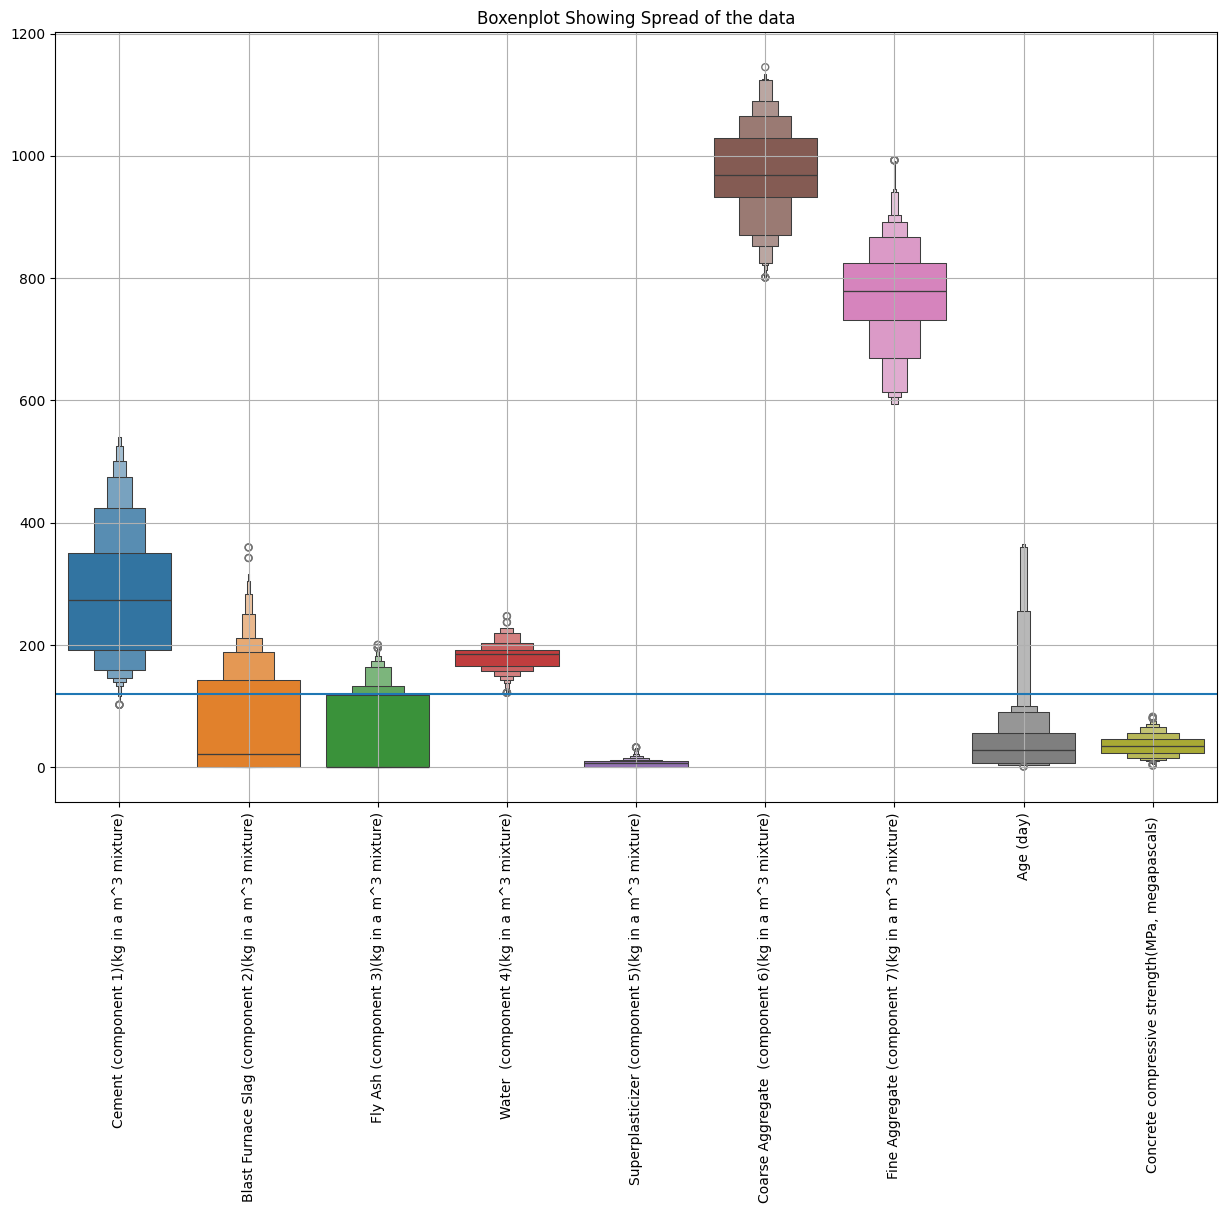

In [14]:
plt.figure(figsize=(15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation=90)
plt.title('Boxenplot Showing Spread of the data')
plt.grid()
plt.show()

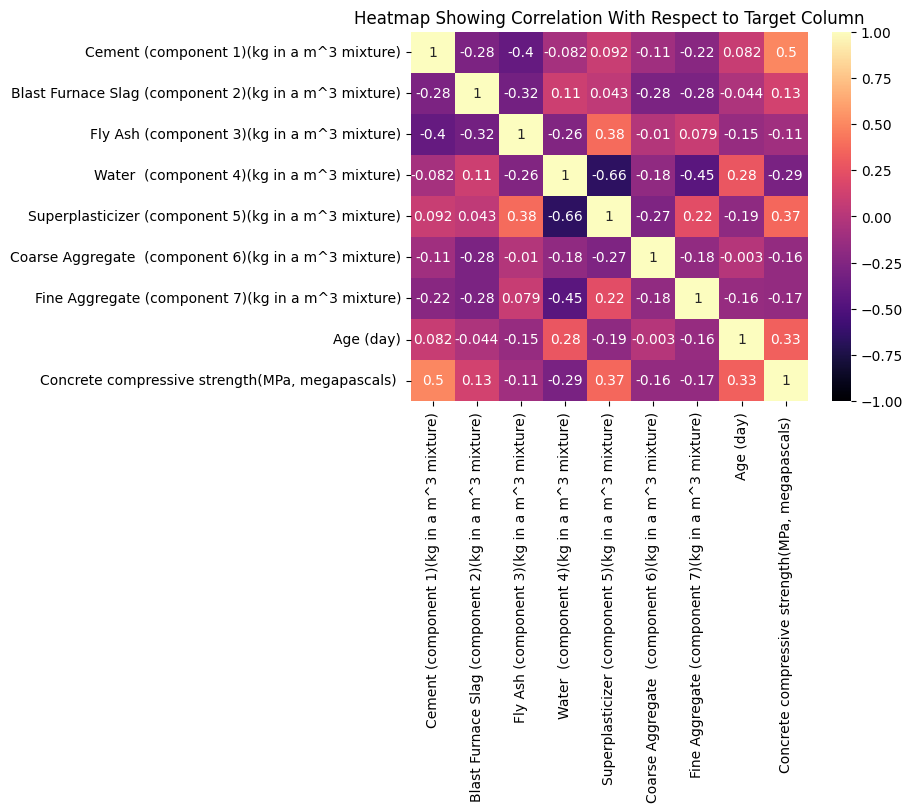

In [15]:
'''
# target column is the last column so see the value of the last column to see the contribution
'''
sns.heatmap(df.corr(),annot=True,center=0,vmax=1,vmin=-1,cmap='magma')
plt.title('Heatmap Showing Correlation With Respect to Target Column')
plt.show()

In [16]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

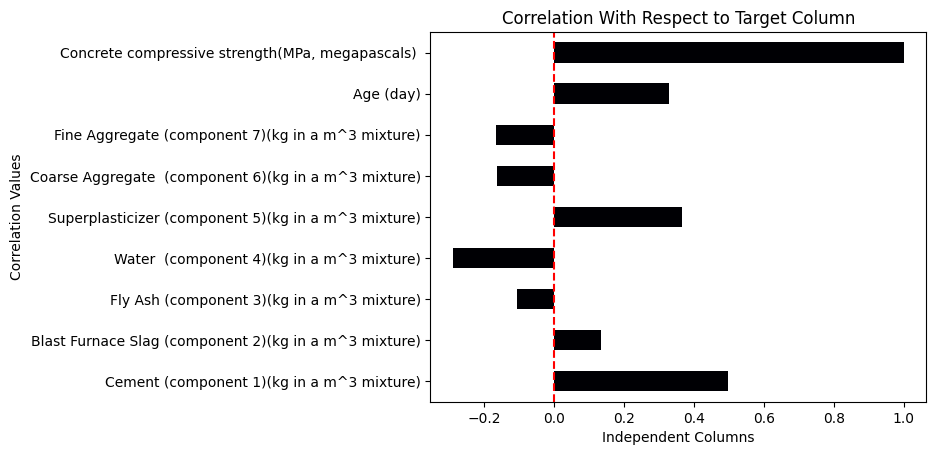

In [17]:
#This Graph shows the correlation of all the columns with respect to target column
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind='barh',cmap='magma')
plt.axvline(0,linestyle='--',color='red')
plt.title('Correlation With Respect to Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

# **Data Cleaning and Preprocessing**

In [18]:
#Checking Top Five Rows of Dataset

'''
1. As the dataset contains no categorical column, hence no need of converting categorical column to numerical column.
2. No Missing Value is present in the dataset.
'''

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [20]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column

X = df.drop(columns= 'Concrete compressive strength(MPa, megapascals) ',axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using the Train Test Split
# test_size lies betweem 0.20 to 0.35
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

#Using Scaling Techniques
sc = MinMaxScaler()

#Seen Data
X_train = sc.fit_transform(X_train)
#Unseen Data
X_test = sc.transform(X_test)

In [21]:
X_train.min(),X_train.max()

(np.float64(0.0), np.float64(1.0000000000000002))

In [22]:
#Linear Regression

'''
# sklearn is a library
'''

from sklearn.linear_model import LinearRegression
# fit model is always on training or seen data
LR = LinearRegression().fit(X_train,y_train)
# Prediction values are based on Unseen Data ie. test data
y_pred_LR = LR.predict(X_test)
#y_test: actual value and y_pred_LR: Predicted value
print('Model Accuracy for Linear Regression: ',r2_score(y_test,y_pred_LR))

Model Accuracy for Linear Regression:  0.5943782479239215


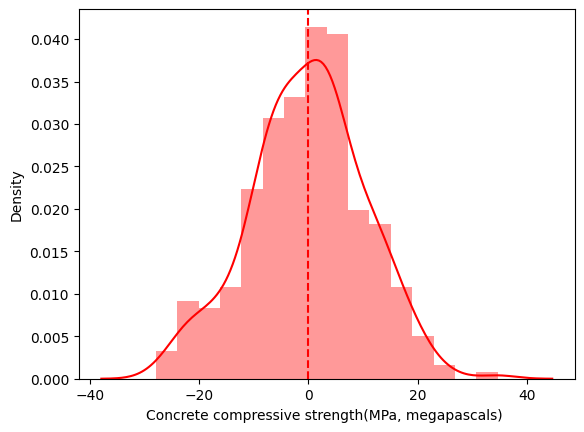

In [23]:
sns.distplot(y_test - y_pred_LR,color='red')
plt.axvline(0,linestyle='--',color='red')

Text(0, 0.5, 'Y_pred')

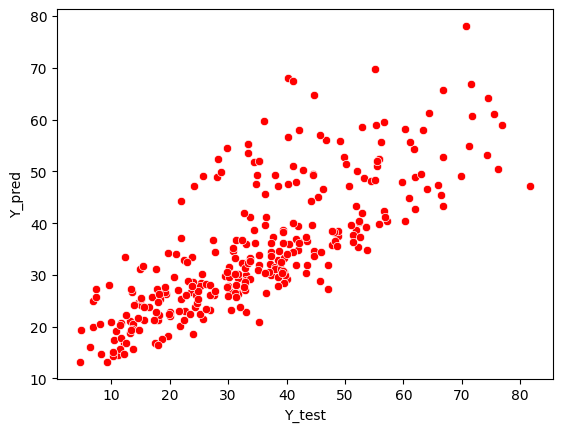

In [24]:
sns.scatterplot(x=y_test, y = y_pred_LR,color='red')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

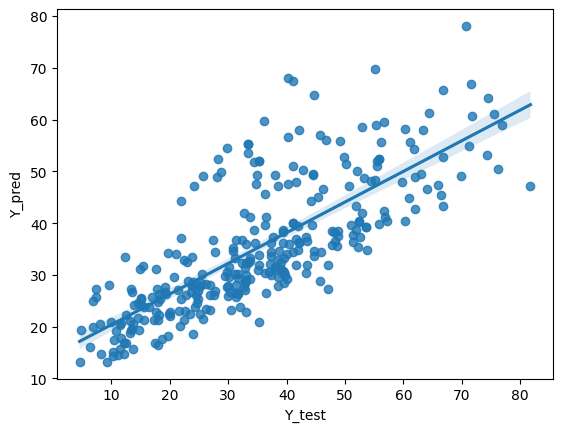

In [27]:
sns.regplot(x=y_test, y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [28]:
# Evalate Coefficient
'''
#equation of line, y = mx+c
#LR.coef_ is x
'''
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [29]:
'''
# LR.intercept_is value of c
'''
LR.intercept_


np.float64(-13.616932642237444)

In [30]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for Decision Tress Regressor', r2_score(y_test,y_pred_DT))

The Model Accuracy for Decision Tress Regressor 0.8181392793269668


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

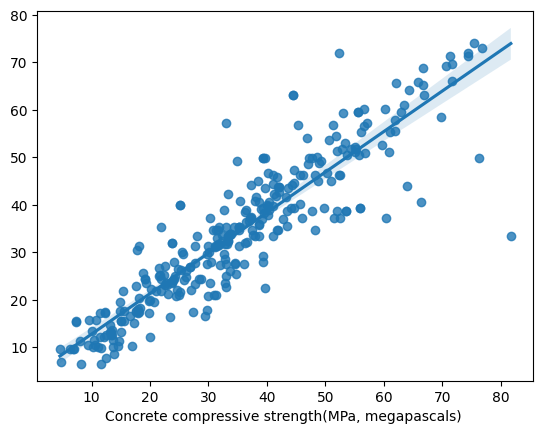

In [31]:
sns.regplot(x = y_test, y = y_pred_DT)

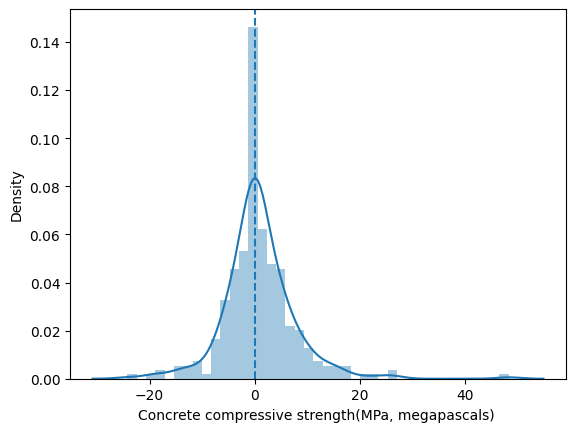

In [32]:
sns.distplot(y_test - y_pred_DT)
plt.axvline(0,linestyle ='--')

In [33]:
# Random Forest Regressor
'''
# A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset
# and uses averaging to improve the predictive accuracy and control over-fitting
'''

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for Random Forest Regressor',r2_score(y_test,y_pred_RF))

The Model Accuracy for Random Forest Regressor 0.8859289663950102


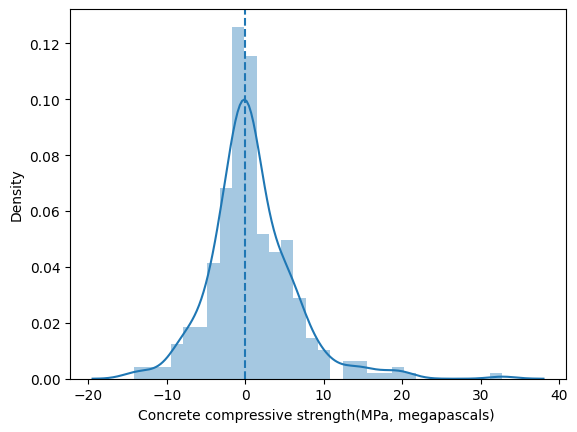

In [35]:
sns.distplot(y_test-y_pred_RF)
plt.axvline(0,linestyle ='--')


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

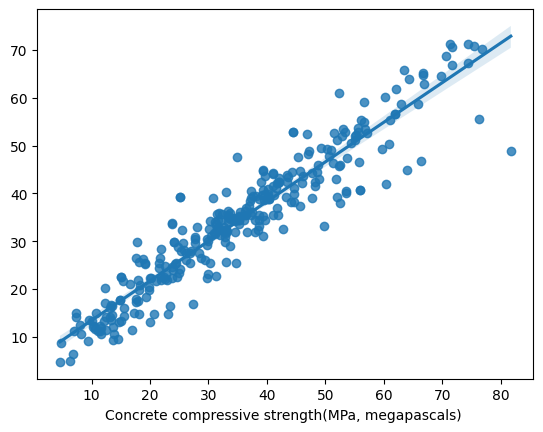

In [36]:
sns.regplot(x = y_test, y = y_pred_RF)

FEATURE SELECTION:
Feature means Columns
Step 1: Feature Selection
X1 = Cement = 0.3305
X8 = Age = 0.3318
X4 = Water = 0.1154

Step 2: based on heatmap Correaltion Matrix
X5 = Superplasticizer = 0.068 ...(it is selcted because heatmap show it contributes more for target column ,ie. 0.37)

In [41]:
RF.feature_importances_

array([0.33054679, 0.07503097, 0.01836453, 0.11547597, 0.0687067 ,
       0.02558992, 0.03444983, 0.33183529])